In [17]:
import yfinance as yf
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import talib

In [18]:
data=yf.download("0005.hk")

[*********************100%***********************]  1 of 1 completed


In [19]:
df = data
#Create one more column Prediction shifted 15 days up.
df['Prediction'] = data[['Close']].shift(-1)
#print data set
df=df.dropna()
print(df)

                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2000-01-03  111.000000  111.500000  107.500000  108.000000  55.387089   
2000-01-04  106.000000  106.500000  105.000000  106.000000  54.361347   
2000-01-05  101.000000  102.000000   99.500000  100.500000  51.540741   
2000-01-06  101.000000  102.000000   96.250000   97.000000  49.745789   
2000-01-07   98.500000  101.000000   97.500000  100.500000  51.540741   
...                ...         ...         ...         ...        ...   
2021-12-23   46.299999   46.299999   45.900002   46.200001  46.200001   
2021-12-24   46.450001   46.450001   46.450001   46.450001  46.450001   
2021-12-28   46.500000   46.750000   46.299999   46.599998  46.599998   
2021-12-29   46.799999   46.849998   46.500000   46.849998  46.849998   
2021-12-30   46.900002   47.049999   46.750000   46.900002  46.900002   

              Volume  Prediction  
Date           

In [20]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df.drop(['Prediction'],1))
# scaler=MinMaxScaler(feature_range=(-1,1))
# X=scaler.fit_transform(X)
#Remove the last 15 rows
x_unseen=X[-100:]
X = X[:-100]
print(X.shape)
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])
# Remove Last 15 rows
y_unseen=y[-100:]
y = y[:-100]
print(X)

(5401, 6)
[[1.11000000e+02 1.11500000e+02 1.07500000e+02 1.08000000e+02
  5.53870888e+01 3.90816400e+06]
 [1.06000000e+02 1.06500000e+02 1.05000000e+02 1.06000000e+02
  5.43613472e+01 6.89537800e+06]
 [1.01000000e+02 1.02000000e+02 9.95000000e+01 1.00500000e+02
  5.15407410e+01 1.46570980e+07]
 ...
 [4.25000000e+01 4.31500015e+01 4.22999992e+01 4.29000015e+01
  4.23612061e+01 1.82722130e+07]
 [4.30000000e+01 4.37500000e+01 4.29000015e+01 4.31500015e+01
  4.26080666e+01 1.51575430e+07]
 [4.27999992e+01 4.34500008e+01 4.27000008e+01 4.32999992e+01
  4.27561798e+01 1.23058190e+07]]


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_844/893241783.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))


In [21]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [22]:
regr=RandomForestRegressor()
regr.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
y_pred=regr.predict(x_test)

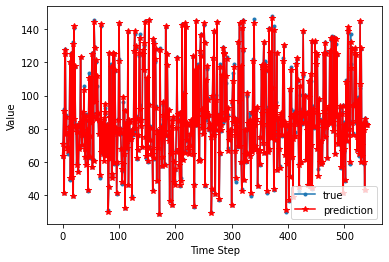

In [24]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [25]:
mean_absolute_percentage_error(y_test,y_pred)

0.011561434788870771

In [26]:
r2_score(y_test,y_pred)

0.9972058469218376

In [27]:
mean_squared_error(y_test,y_pred)

2.024587814493447

In [28]:
unseend_pred = regr.predict(x_unseen)

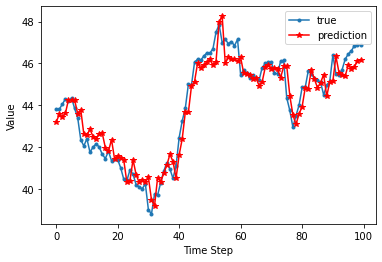

In [29]:
plt.plot(y_unseen, marker='.', label="true")
plt.plot(unseend_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [30]:
mean_absolute_percentage_error(y_unseen,unseend_pred)

0.012098266896430558

In [31]:
r2_score(y_unseen,unseend_pred)

0.923186972705627

In [32]:
mean_squared_error(y_test,y_pred)

2.024587814493447